In [2]:
import pandas as pd

car_v4 = pd.read_csv("car details v4.csv")

In [3]:
vehicle_df = pd.read_csv("vehicle_price_prediction.csv")

In [4]:
car_v4_renamed = car_v4.rename(columns={
    'Make': 'make',
    'Model': 'model',
    'Year': 'year',
    'Kilometer': 'mileage',
    'Fuel Type': 'fuel_type',
    'Transmission': 'transmission',
    'Seller Type': 'seller_type',
    'Drivetrain': 'drivetrain',
    'Price': 'price'
})

for i in vehicle_df.columns:
    if i not in car_v4_renamed.columns:
        car_v4_renamed[i] = None

car_v4_renamed = car_v4_renamed[vehicle_df.columns]


merged_df = pd.concat([vehicle_df, car_v4_renamed], ignore_index=True)


merged_df.info()

C:\Users\akgun\AppData\Local\Temp\ipykernel_36904\948178116.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat([vehicle_df, car_v4_renamed], ignore_index=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002059 entries, 0 to 1002058
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   make              1002059 non-null  object 
 1   model             1002059 non-null  object 
 2   year              1002059 non-null  int64  
 3   mileage           1002059 non-null  int64  
 4   engine_hp         1000000 non-null  object 
 5   transmission      1002059 non-null  object 
 6   fuel_type         1002059 non-null  object 
 7   drivetrain        1001923 non-null  object 
 8   body_type         1000000 non-null  object 
 9   exterior_color    1000000 non-null  object 
 10  interior_color    1000000 non-null  object 
 11  owner_count       1000000 non-null  object 
 12  accident_history  249867 non-null   object 
 13  seller_type       1002059 non-null  object 
 14  condition         1000000 non-null  object 
 15  trim              1000000 non-null  object 
 16  

In [5]:
merged_df.head()

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,...,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price,source
0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,Blue,...,5,NaN,Dealer,Excellent,EX,9,20433.666667,0.040054,7208.52,vehicle_dataset
1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,Silver,...,5,Minor,Dealer,Good,LX,15,15776.200000,0.039921,6911.81,vehicle_dataset
2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,Silver,...,5,NaN,Dealer,Excellent,Touring,9,11466.555556,0.040230,11915.63,vehicle_dataset
3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,Black,...,3,NaN,Private,Good,Base,9,13209.888889,0.039847,25984.79,vehicle_dataset
4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,Red,...,5,Minor,Dealer,Excellent,Sport,7,29167.142857,0.039627,8151.30,vehicle_dataset


In [6]:
merged_df.duplicated().sum()

np.int64(5)

In [102]:
df_new = merged_df.drop(columns = ['exterior_color', 'interior_color', 'accident_history' , 'seller_type', 'trim', 'mileage_per_year', 'condition'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002059 entries, 0 to 1002058
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   make              1002059 non-null  object 
 1   model             1002059 non-null  object 
 2   year              1002059 non-null  int64  
 3   mileage           1002059 non-null  int64  
 4   engine_hp         1000000 non-null  object 
 5   transmission      1002059 non-null  object 
 6   fuel_type         1002059 non-null  object 
 7   drivetrain        1001923 non-null  object 
 8   body_type         1000000 non-null  object 
 9   owner_count       1000000 non-null  object 
 10  vehicle_age       1000000 non-null  object 
 11  brand_popularity  1000000 non-null  float64
 12  price             1002059 non-null  float64
 13  source            1002059 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 107.0+ MB


In [103]:
df_new = df_new.drop_duplicates(subset=['model', 'year'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4037 entries, 0 to 1002056
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              4037 non-null   object 
 1   model             4037 non-null   object 
 2   year              4037 non-null   int64  
 3   mileage           4037 non-null   int64  
 4   engine_hp         2446 non-null   object 
 5   transmission      4037 non-null   object 
 6   fuel_type         4037 non-null   object 
 7   drivetrain        3927 non-null   object 
 8   body_type         2446 non-null   object 
 9   owner_count       2446 non-null   object 
 10  vehicle_age       2446 non-null   object 
 11  brand_popularity  2446 non-null   float64
 12  price             4037 non-null   float64
 13  source            4037 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 473.1+ KB


In [61]:
df_new['engine_hp'] = (df_new['engine_hp'].astype(float))

In [62]:
df_new['owner_count'] = (df_new['owner_count'].astype(float))

In [63]:
df_new['vehicle_age'] = (df_new['vehicle_age'].astype(float))

In [12]:
df_new.isnull().sum()

make                   0
model                  0
year                   0
mileage                0
engine_hp           2030
transmission           0
fuel_type              0
drivetrain           136
body_type           2030
owner_count         2030
vehicle_age         2030
brand_popularity    2030
price                  0
source                 0
dtype: int64

In [13]:
df_new.dtypes

make                 object
model                object
year                  int64
mileage               int64
engine_hp           float64
transmission         object
fuel_type            object
drivetrain           object
body_type            object
owner_count         float64
vehicle_age         float64
brand_popularity    float64
price               float64
source               object
dtype: object

In [14]:
import numpy as np
df_new['Transmission Class'] = np.where(df_new['transmission'] == 'Automatic',1,0)
df_new.head()

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,owner_count,vehicle_age,brand_popularity,price,source,Transmission Class
0,Volkswagen,Jetta,2016,183903,173.0,Manual,Electric,RWD,Sedan,5.0,9.0,0.040054,7208.52,vehicle_dataset,0
1,Lexus,RX,2010,236643,352.0,Manual,Gasoline,FWD,Sedan,5.0,15.0,0.039921,6911.81,vehicle_dataset,0
2,Subaru,Crosstrek,2016,103199,188.0,Automatic,Diesel,AWD,Sedan,5.0,9.0,0.040230,11915.63,vehicle_dataset,1
3,Cadillac,Lyriq,2016,118889,338.0,Manual,Gasoline,AWD,SUV,3.0,9.0,0.039847,25984.79,vehicle_dataset,0
4,Toyota,Highlander,2018,204170,196.0,Manual,Diesel,FWD,Sedan,5.0,7.0,0.039627,8151.30,vehicle_dataset,0


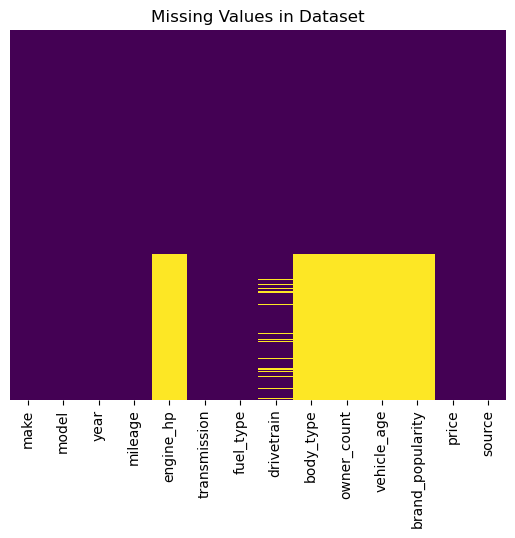

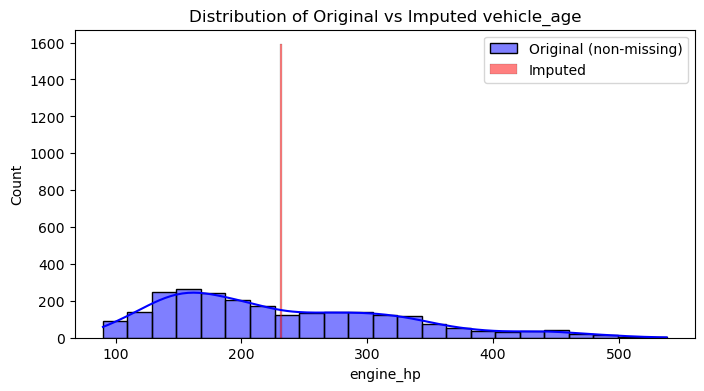


Original data statistics:
count    2446.000000
mean      231.584219
std        92.183240
min        90.000000
25%       159.000000
50%       210.000000
75%       295.000000
max       538.000000
Name: engine_hp, dtype: float64

Imputed data statistics:
count    4037.000000
mean      231.584219
std        71.748995
min        90.000000
25%       190.000000
50%       231.584219
75%       238.000000
max       538.000000
Name: engine_hp, dtype: float64


In [43]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.heatmap(df_new.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Dataset')

plt.show()

numeric_columns = ['engine_hp', 'owner_count', 'vehicle_age', 'brand_popularity']
df_numeric = df_new[numeric_columns]

df_with_missing = df_numeric[df_numeric.isnull().any(axis=1)]
df_without_missing = df_numeric.dropna()

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_without_missing), columns=df_without_missing.columns)

imputer = KNNImputer(n_neighbors=5)
imputer.fit(df_scaled)

def impute_and_inverse_transform(data):
    # Ensure 'data' is always a DataFrame with proper column names
    scaled_data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)
    imputed_scaled = imputer.transform(scaled_data)
    return pd.DataFrame(scaler.inverse_transform(imputed_scaled), columns=data.columns, index=data.index)

df_imputed = impute_and_inverse_transform(df_numeric)

# compare original and imputed data for a specific column (e.g., 'mass')
plt.figure(figsize=(8, 4))
sns.histplot(df_numeric['engine_hp'].dropna(), kde=True, color='blue', alpha=0.5, label='Original (non-missing)')
sns.histplot(df_imputed.loc[df_numeric['engine_hp'].isnull(), 'engine_hp'], kde=True, color='red', alpha=0.5, label='Imputed')
plt.title('Distribution of Original vs Imputed vehicle_age')
plt.legend()
plt.show()

# print some statistics
print("\nOriginal data statistics:")
print(df_numeric['engine_hp'].describe())
print("\nImputed data statistics:")
print(df_imputed['engine_hp'].describe())

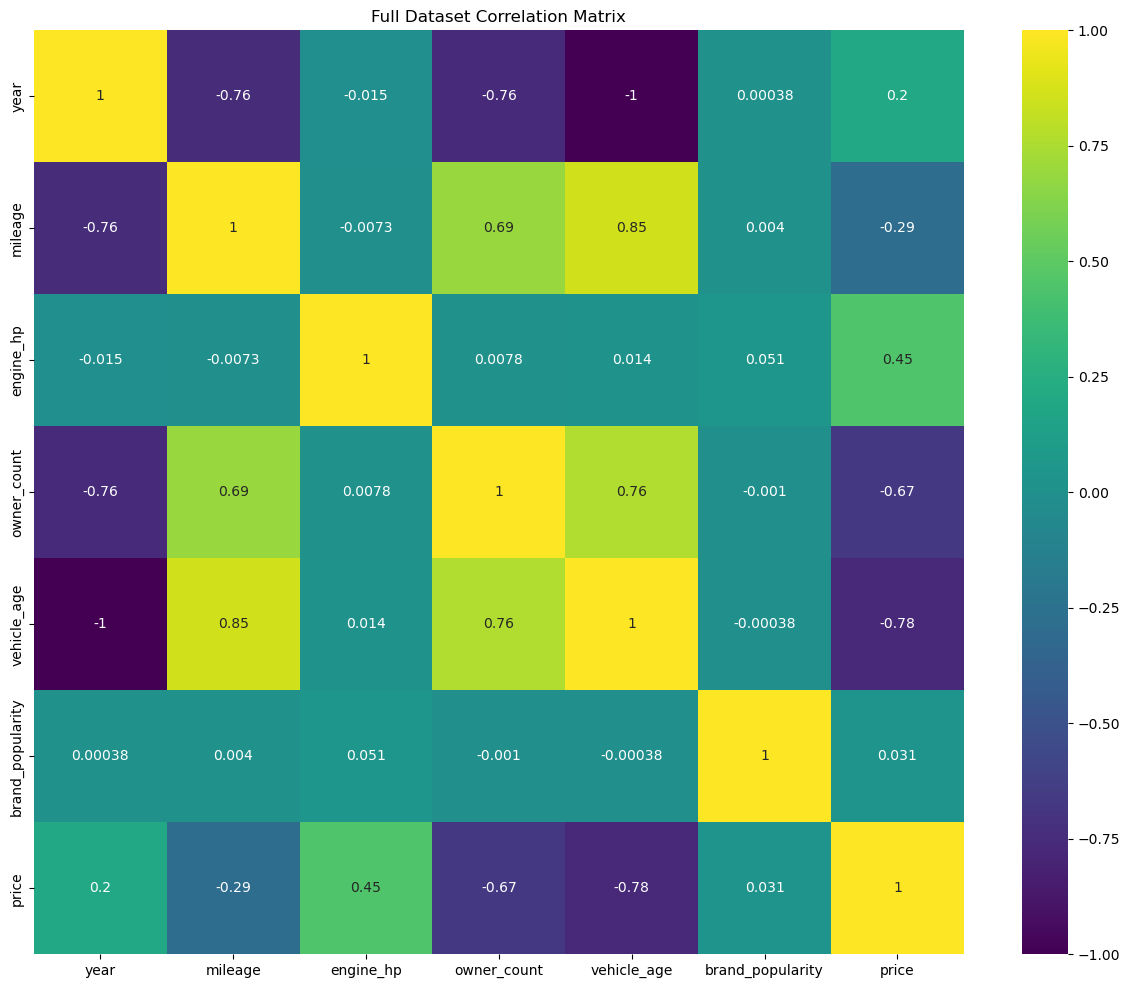

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
sns.heatmap(df_new.corr(numeric_only=True), annot=True, cmap = "viridis", vmin=-1, vmax=1)
plt.title("Full Dataset Correlation Matrix")
plt.show()

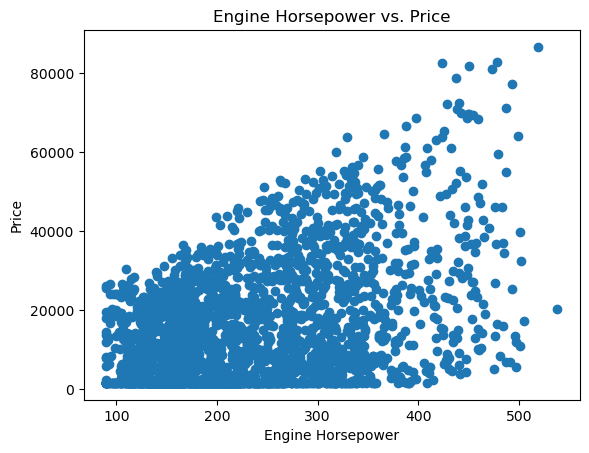

In [69]:
plt.scatter(df_new['engine_hp'], df_new['price'])
plt.xlabel("Engine Horsepower")
plt.ylabel("Price")
plt.title("Engine Horsepower vs. Price")
plt.show()

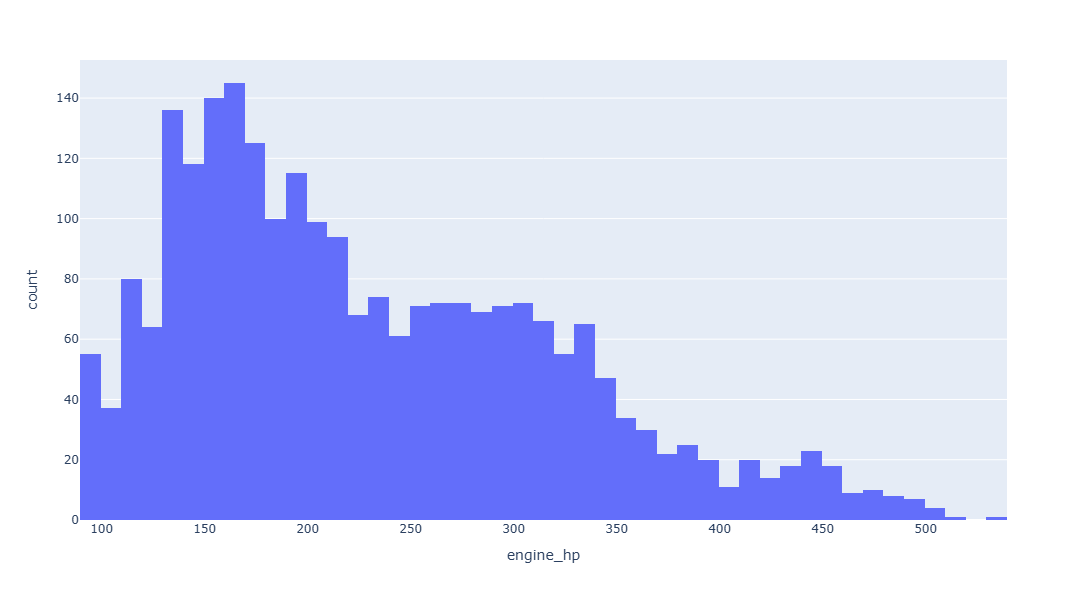

In [94]:
import plotly.express as px

fig = px.histogram(df_new, x="engine_hp",
                   width=1000,  
                   height=600)

fig.show()

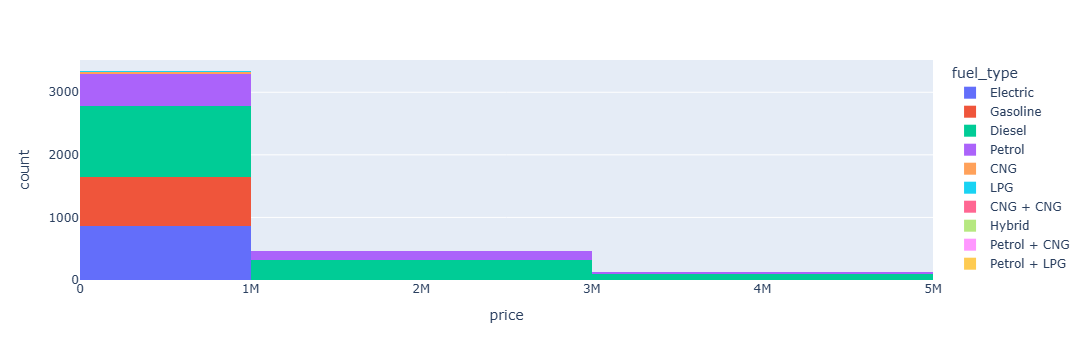

In [97]:
fig = px.histogram(df_new, x = 'price', color = 'fuel_type', nbins=20)
fig.update_layout(
    xaxis=dict(range=[0.0, 5000000.0]))

fig.show()

In [89]:
fig = px.scatter_3d(df_new, x='price', y='vehicle_age', z='engine_hp',
              color='drivetrain')
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[0, 100000])))
fig.show()